8. I denna uppgift arbetar vi med CIFAR-100 datasetet som gicks igenom i kodexempel  
a) Skapa en CNN-modell för att prediktera datasetet. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [2]:
# Loading CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Limit the dataset so training goes faster for demonstration purposes (try using the full dataset)
limit = 1000
x_train = x_train[:limit]
y_train = y_train[:limit]
x_test = x_test[:limit]
y_test = y_test[:limit]

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Checking dimensions
print(np.shape(x_train))

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 85s 1us/step
(1000, 32, 32, 3)


In [3]:
print(np.shape(y_train))
print(y_train[0:5])

(1000, 1)
[[19]
 [29]
 [ 0]
 [11]
 [ 1]]


In [4]:
# one hot representation of labels
y_train = to_categorical(y_train, 100)
print(np.shape(y_train))
print(y_train)

(1000, 100)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


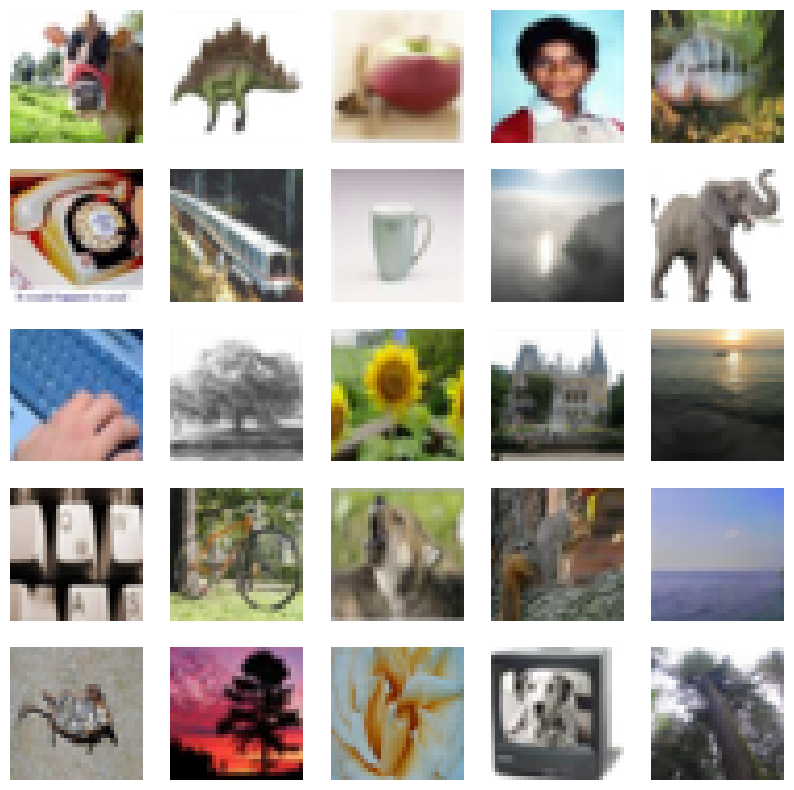

In [5]:
# Doing some plots of the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


c:\Users\kaspe\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.0113 - loss: 4.6164 - val_accuracy: 0.0200 - val_loss: 4.6026
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.0175 - loss: 4.5873 - val_accuracy: 0.0200 - val_loss: 4.5971
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.0137 - loss: 4.5618 - val_accuracy: 0.0050 - val_loss: 4.5798
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0175 - loss: 4.5500 - val_accuracy: 0.0200 - val_loss: 4.5814
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.0250 - loss: 4.4587 - val_accuracy: 0.0250 - val_loss: 4.5304
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0350 - loss: 4.4328 - val_accuracy: 0.0200 - val_loss: 4.5209
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.0362 - loss: 4.4066 - val_accuracy: 0.0050 - val_loss: 4.5212
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.0388 - loss: 4.3525 - val_accuracy: 0.0100 - val_loss: 4.66

In [7]:
# Make predictions and evaluate the model
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred_labels == y_test.flatten())
print(f"Accuracy: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy: 0.027


b) Om du justerar hyperparametrar med *KerasTuner*, får du bättre resultat? 

In [10]:
import keras_tuner
from tensorflow import keras


In [11]:
def build_model(hp):
    """Build model with tunable hyperparameters based on your existing architecture"""
    model = Sequential()
    
    # First Conv2D block - tune filters
    hp_filters_1 = hp.Int('conv1_filters', min_value=16, max_value=64, step=16)
    model.add(Conv2D(hp_filters_1, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second Conv2D block - tune filters
    hp_filters_2 = hp.Int('conv2_filters', min_value=32, max_value=128, step=32)
    model.add(Conv2D(hp_filters_2, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third Conv2D block - tune filters
    hp_filters_3 = hp.Int('conv3_filters', min_value=64, max_value=256, step=64)
    model.add(Conv2D(hp_filters_3, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Fourth Conv2D block - tune filters
    hp_filters_4 = hp.Int('conv4_filters', min_value=128, max_value=512, step=128)
    model.add(Conv2D(hp_filters_4, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    # Tune dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1)
    model.add(Dropout(hp_dropout))
    
    # Tune Dense layer units
    hp_units = hp.Int('dense_units', min_value=256, max_value=1024, step=256)
    model.add(Dense(hp_units, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    # Tune learning rate
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create tuner
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_tuner',
    project_name='cifar100'
)

tuner.search_space_summary()

Search space summary
Default search space size: 7
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
conv4_filters (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dropout (Float)
{'default': 0.3, 'conditions': [], 'min_value': 0.3, 'max_value': 0.7, 'step': 0.1, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 1024, 'step': 256, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


c:\Users\kaspe\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Run hyperparameter search
tuner.search(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Get best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]
print(f"\nBest hyperparameters found:")
print(f"Conv1 filters: {best_hp.get('conv1_filters')}")
print(f"Conv2 filters: {best_hp.get('conv2_filters')}")
print(f"Conv3 filters: {best_hp.get('conv3_filters')}")
print(f"Conv4 filters: {best_hp.get('conv4_filters')}")
print(f"Dropout: {best_hp.get('dropout')}")
print(f"Dense units: {best_hp.get('dense_units')}")
print(f"Learning rate: {best_hp.get('learning_rate')}")

# Train best model
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate
y_pred = best_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred_labels == y_test.flatten())
print(f"\nTuned model accuracy: {accuracy}")

Trial 10 Complete [00h 00m 14s]
val_accuracy: 0.019999999552965164

Best val_accuracy So Far: 0.04500000178813934
Total elapsed time: 00h 02m 19s

Best hyperparameters found:
Conv1 filters: 16
Conv2 filters: 96
Conv3 filters: 64
Conv4 filters: 512
Dropout: 0.4
Dense units: 256
Learning rate: 0.01
Epoch 1/20


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.0100 - loss: 8.2549 - val_accuracy: 0.0200 - val_loss: 4.6049
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.0213 - loss: 4.5924 - val_accuracy: 0.0200 - val_loss: 4.6212
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.0213 - loss: 4.5789 - val_accuracy: 0.0200 - val_loss: 4.6439
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.0162 - loss: 4.5649 - val_accuracy: 0.0100 - val_loss: 4.6437
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.0188 - loss: 4.5615 - val_accuracy: 0.0100 - val_loss: 4.6475
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0150 - loss: 4.5586 - val_accuracy: 0.0000e+00 - val_loss: 4.6378
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0175 - loss: 4.5593 - val_accuracy: 0.0000e+00 - val_loss: 4.6344
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0188 - loss: 4.5574 - val_accuracy: 0.0100 - val_loss: 4.6573
Ep